#### 29.09.22, &copy; [Daniil Tereshchenko](https://www.linkedin.com/in/daniil-tereshchenko/), 2022

# Лабораторна робота №2. Аналіз складності алгоритмів (short version)

__Мета:__ _Освоїти аналіз складності алгоритмів як технологію на прикладі алгоритмів сортування методами включення та обміну._

#### Що я буду вміти?
* Виконувати асимптотичний аналіз складності алгоритмів.
* Досліджувати часову складінсть алгоритмів емпіричним шляхом засобами мови Python.
* Вибирати оптимальний алгоритм.
* Генерувати випадкові послідовності чисел засобами Python
* Будувати графіки засобами бібліотеки matplotlib

## Оцінка часу роботи програми на мові Python
Відомо, що оцінка асимптотичної складності алгоритму сортування методом включення (див. рис.) (вставки) дорівнює $O(n^2)$
, тобто при збільшенні розміру задачі у два рази, час на її виконання збільшується вчетверо.
Іноді корисно вміти оцінювати час виконання алгоритму на практиці, особливо у випадку, коли необхідно порівняти різні алгоритми з однаковою аисмптотикою при малих розмірах задачі.

![Сортування методом включення](image/Insertion-sort.gif)

Один з можливих підходів оцінки часу виконання програми, написаної на Python, може бути реалізований за допомогою пакету time.
Нижче наведено код процедури на Python, який реалізує алгоритм сортування методом вставки, і дозволяє оцінити час її виконання.

In [135]:
import time
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
array = [5,10,50,100,500,1000,2000,3000,4000,5000,10000,20000]
#array = [1,2,3,4,5,6,7,8,9,10]

In [38]:
start_time2 = time.time()

def booble_e(A):
    for i in range(len(A)-1):                     #| c1 | n
        for j in range(len(A)-i-1):               #| c2 | sum_j=0 > n(t_j)
            if A[j] > A[j+1]:                     #| c3 | sum_j=0 > n(t_j -1)
                A[j], A[j+1] = A[j+1], A[j]       #| c4 | sum_j=0 > n(t_j -1)
                
booble_e(array)

print("--- %s seconds ---" % (time.time() - start_time2))

time2 = (time.time() - start_time2)

--- 0.0005350112915039062 seconds ---


$$
T(n) = c_{1}n + c_{2}\sum_{j=0}^{n} t_{j} + c_{3}\sum_{j=0}^{n} (t_{j}-1) +  c_{4}\sum_{j=0}^{n} (t_{j}-1)
$$

$$
\sum_{j=0}^{n} j = \frac{n^2}{2}
$$

$$
\sum_{j=0}^{n} j = \frac{n(n-1)}{2}
$$

$$
T(n) = c_{1}n + c_{2}\frac{n^2}{2} + c_{3}\frac{n^2}{2} - c_{3}\frac{n}{2} + c_{4}\frac{n^2}{2} - c_{4}\frac{n}{2}
$$

$$
T(n) = n^2(\frac{c_{2}}{2} + \frac{c_{3}}{2} + \frac{c_{4}}{2}) + n(c_{1} - c_{3} - c_{4}) 
$$


Тепер функція $T(n)$ - квадратична, тобто має вид $T(n) = an^2 + bn + c$. (Константи $a$, $b$ і $c$ визначаються значеннями $c_{1}-c_{4}$.)

In [39]:

start_time3 = time.time()

def insertion_sort_e(A):
    for j in range(1, len(A)):                     #| c1 | n
        key = A[j]                                 #| c2 | n - 1
        i = j - 1                                  #| c3 | n - 1
        while i >= 0 and A[i] > key:               #| c4 | sum_j=2 > n(t_j)
            A[i + 1] = A[i]                        #| c5 | sum_j=2 > n(t_j-1)
            i -= 1                                 #| c6 | sum_j=2 > n(t_j-1)
        A[i + 1] = key                             #| c7 | n - 1

insertion_sort_e(array)

print("--- %s seconds ---" % (time.time() - start_time3))

time3 = (time.time() - start_time3)

--- 0.0005266666412353516 seconds ---


$$
T(n) = c_{1}n + c_{2}(n-1) + c_{3}(n-1) + c_{4}\sum_{j=2}^{n} t_{j} + c_{5}\sum_{j=2}^{n} (t_{j}-1) + c_{6}\sum_{j=2}^{n} (t_{j}-1) + c_{7}(n-1)
$$
Розглянемо найсприятливіші умови для цього алгоритму. При відсортованому масимі всі $t_{j} = 1$ а, отже $t_{j} -1 = 0$
$$
T(n) = c_{1}n + c_{2}(n-1) + c_{3}(n-1) + c_{4}\sum_{j=2}^{n} t_{j} + c_{7}(n-1)
$$
$$
\sum_{j=2}^{n} j = n - 1
$$
$$
T(n) = c_{1}n + c_{2}(n-1) + c_{3}(n-1) + c_{4}(n-1) + c_{7}(n-1)
$$
$$
T(n) = n(c_{1} + c_{2} + c_{3} + c_{4} + c_{7}) - (c_{2} + c_{3} + c_{4} + c_{7})
$$

Тепер функція $T(n)$ - лінійна, тобто має вид $T(n) = an + b$. (Константи $a$ і $b$ визначаються значеннями $c_{1}-c_{7}$.)

### Дослідити реальний час виконання обох алгоритмів на Python і побудувати графіки залежностей

In [166]:
random_lists = []
for y in range(0, len(array)):
    random_lists.append(random.sample(range(1, 100001), array[y]))
    (random_lists[y]).sort(reverse = True)

In [167]:
def booble(A):
    for i in range(len(A)-1):                   
        for j in range(len(A)-i-1):              
            if A[j] > A[j+1]:                     
                A[j], A[j+1] = A[j+1], A[j]       

In [168]:
def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = key                        

In [169]:
for y in range(0, len(array)):
    (random_lists[y]).sort(reverse = True)

copy1 = list(random_lists)
time_data1 = []
for ite in range(0, len(array)):
    start_time1 = time.perf_counter()
    booble(copy1[ite])
    time_data1.append((time.perf_counter() - start_time1))
time_data1

[2.1457999991980614e-05,
 5.037500022808672e-05,
 0.001115292000122281,
 0.003184916999998677,
 0.032574292000390415,
 0.09778320899977189,
 0.37804066599983344,
 0.877354958000069,
 1.5525030000003426,
 2.3782565409997005,
 9.689595333999932,
 39.11814341699983]

In [170]:
for y in range(0, len(array)):
    (random_lists[y]).sort(reverse = True)
    
copy2 = list(random_lists)
time_data2 = []
for ite in range(0, len(array)):
    start_time2 = time.time()
    insertion_sort(copy2[ite])
    time_data2.append((time.time() - start_time2))
time_data2

[4.291534423828125e-06,
 5.9604644775390625e-06,
 0.00014090538024902344,
 0.0005578994750976562,
 0.015537023544311523,
 0.06240081787109375,
 0.2511889934539795,
 0.5699589252471924,
 1.0188689231872559,
 1.5958478450775146,
 6.518068075180054,
 26.33964204788208]

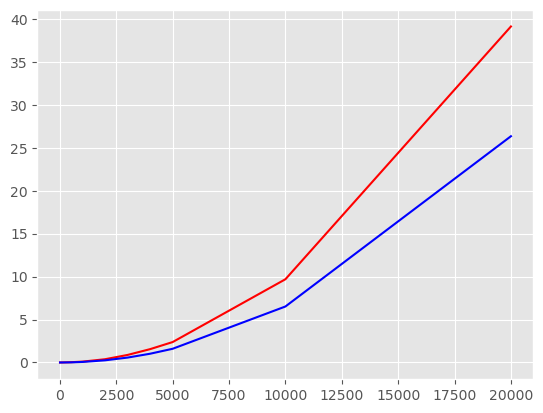

In [171]:
plt.plot(array, time_data1, color='r', label='booble sort')
plt.plot(array, time_data2, color='b', label='insertion sort')

### Контрольні запитання

1. Що таке $O$ - нотація і чим вона відрізняється від $\Omega$- нотації?
    * Якщо алгоритм має складність $O(n)$ то його ефективінсть $\le n$ і навпаки коли має складність $Omega(n)$ то його ефективність $\ge n$
2. Яку часову складність має алгоритм сортування методом вставки за найсприятливішої умови, коли масив відсортовано? Відповідь обгрунтувати.

    * Розглянемо найсприятливіші умови для цього алгоритму. При відсортованому масиві всі $t_{j} = 1$ а, отже $t_{j} -1 = 0$
    * Отже алгоритм має складніть $O(n)$, доведення чому:
$$
T(n) = c_{1}n + c_{2}(n-1) + c_{3}(n-1) + c_{4}\sum_{j=2}^{n} t_{j} + c_{7}(n-1)
$$
$$
\sum_{j=2}^{n} j = n - 1
$$
$$
T(n) = c_{1}n + c_{2}(n-1) + c_{3}(n-1) + c_{4}(n-1) + c_{7}(n-1)
$$
$$
T(n) = n(c_{1} + c_{2} + c_{3} + c_{4} + c_{7}) - (c_{2} + c_{3} + c_{4} + c_{7})
$$
3. Дати визначення ефективного алогоритму.
    * Ефективний алгоритм - це, за умови того, що ми приймаємо фактор швидкості обчислень як умову ефективності, алгоритм який працює за час меньший, ніж його аналог. Або ж має складність $O(1)$. Ефективним алгоритмом у виборі між $O(n^2)$ та $O(logn)$ буде алгоритм зі складністю $O(logn)$
4. Пояснити поняття головного параметра (розміру) задачі.
    * Головний параметр задачі - змінна яка вказує на кількість елементів або обʼєктів. наприклад booble_srt(N) де N це масив який треба відсортувати.
5. Функція часової складності має вигляд $F(N) = N^3 + 7N^2 - 14N$. Як записати асимптотичну складність в нотації $O()$?
    * $O(n^2)$


# References

1. Anaconda (Python distribution). https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution)
2. Conda. https://conda.io/en/latest/